# Regression and Model Selection

In this notebook I will demonstrate my understanding of overfitting and underfitting using regression as an example. First I will generate a 1-dimensional feature space and an array of values for each row in the feature space. Then I will create regresion estimators based on linear regression (`x**1`) and polynomial regression (2nd, 4th and 6th degree, i.e. `x**2`, `x**4`  and `x**6`). I will show that the higher the polynomial, the better the fit for the train set, but the worse the fit for the test set. I will visually support my case.

I will re-use code from the [Python Data Science Handbook](http://bit.ly/2y3xzKw). To proof my understanding of the code I am re-using, I will comment on the code in my own words, both in MarkDown cells and in frequent code comment.

## 1. create test data

Generate 50 random x-values between 0 and 10
and 50 random y-values between -1,0 and 1,0 and align them around the sine-curve

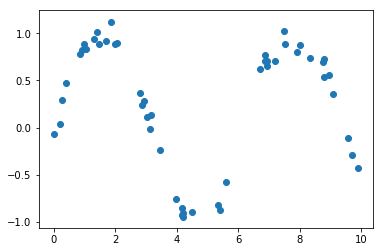

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y =  np.sin(x) + 0.1 * rng.randn(50)
#print(x)
#print(y)


plt.scatter(x, y)


## 2. create the regression pipeline

[your comment goes here]

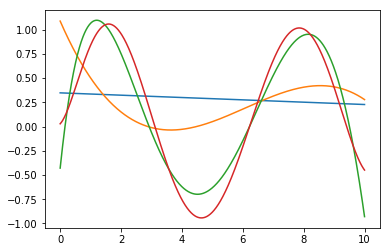

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

#degree1
poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit1 = poly_model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit1);

#degree3
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit3 = poly_model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit3);

#degree5
poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit5 = poly_model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit5);

#degree7
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit7 = poly_model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit7);


## 3. show the regressors

[your comment goes here]

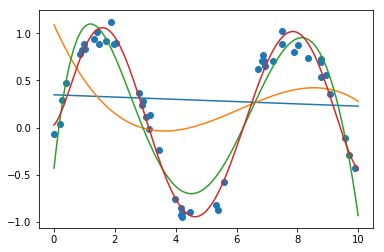

In [48]:
plt.scatter(x, y)
plt.plot(xfit, yfit1);
plt.plot(xfit, yfit3);
plt.plot(xfit, yfit5);
plt.plot(xfit, yfit7);

## 4. show the validation curve

[your comment goes here]

In [52]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
from sklearn.learning_curve import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), np.vstack((X, y)).T,y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

ValueError: all the input array dimensions except for the concatenation axis must match exactly

## 5. conduct grid search to find the optimal regressor

[your comment goes here]

In [ ]:
# your code goes here